In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [28]:
df.shape

(1338, 7)

In [59]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [32]:
print(df.sex.value_counts(), '\n', df.smoker.value_counts(), '\n', df.region.value_counts(), '\n', df.smoker.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64


In [34]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [35]:
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [36]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
5,31,0,25.7,0,0,1,3756.62
6,46,0,33.4,1,0,1,8240.59
7,37,0,27.7,3,0,2,7281.51
8,37,1,29.8,2,0,3,6406.41
9,60,0,25.8,0,0,2,28923.14


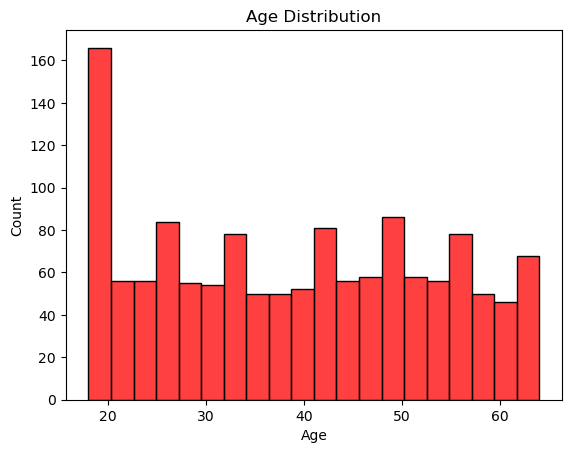

In [37]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

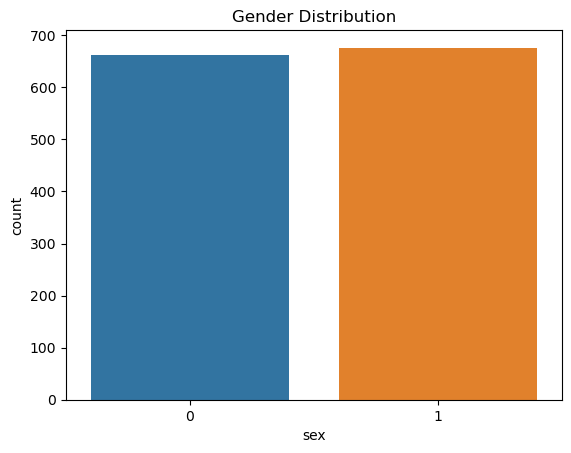

In [38]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

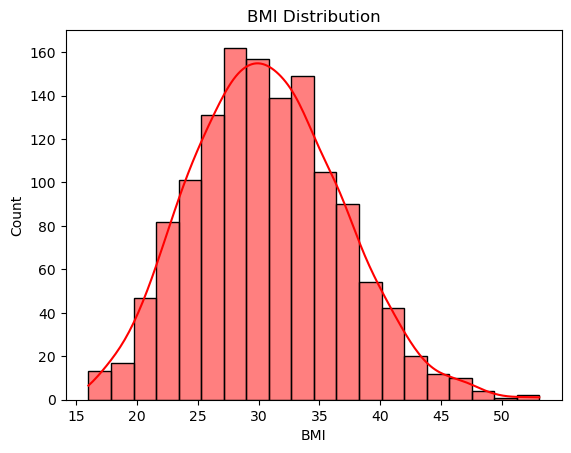

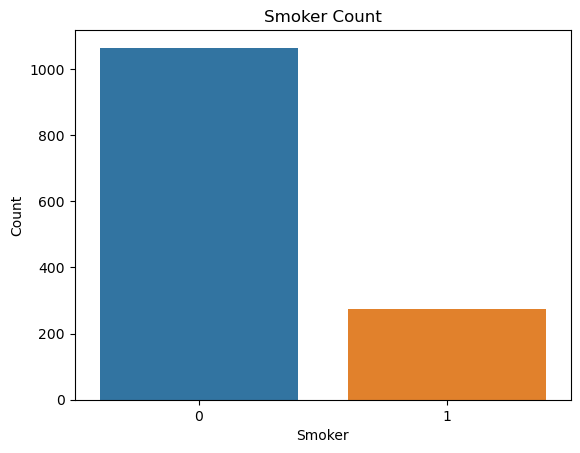

In [42]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='count'>

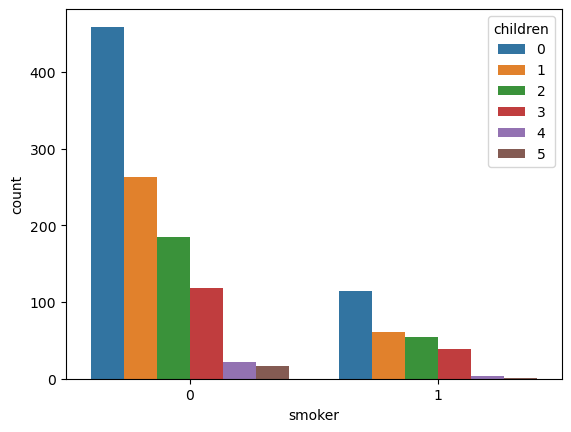

In [43]:
sns.countplot(x = df.smoker, hue = df.children)

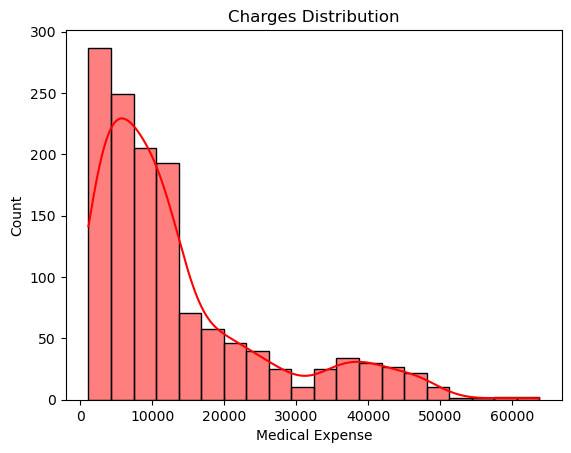

In [44]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

In [45]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157439,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198576,0.067998,0.787251,0.006208,1.000000


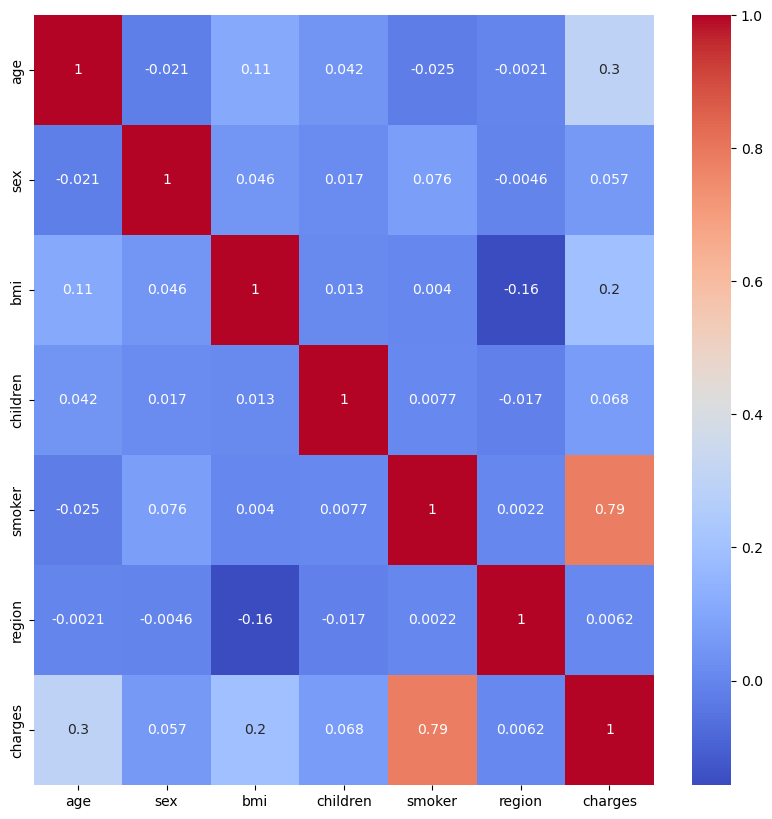

In [46]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

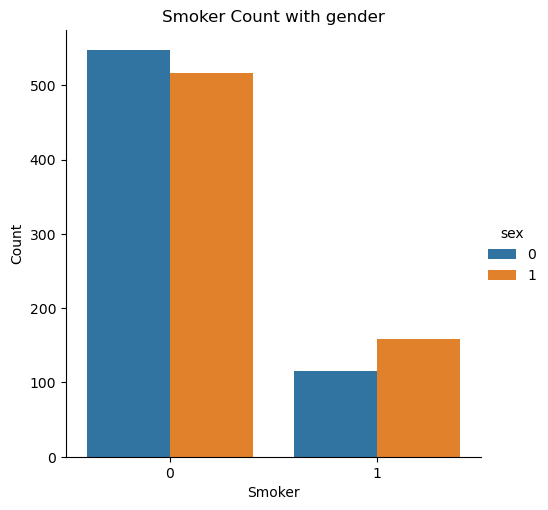

In [47]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

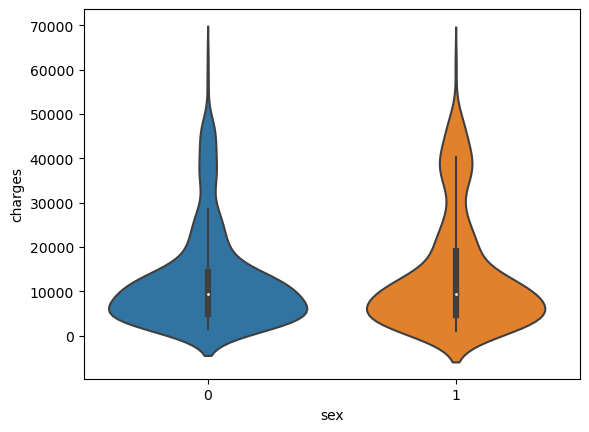

In [48]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

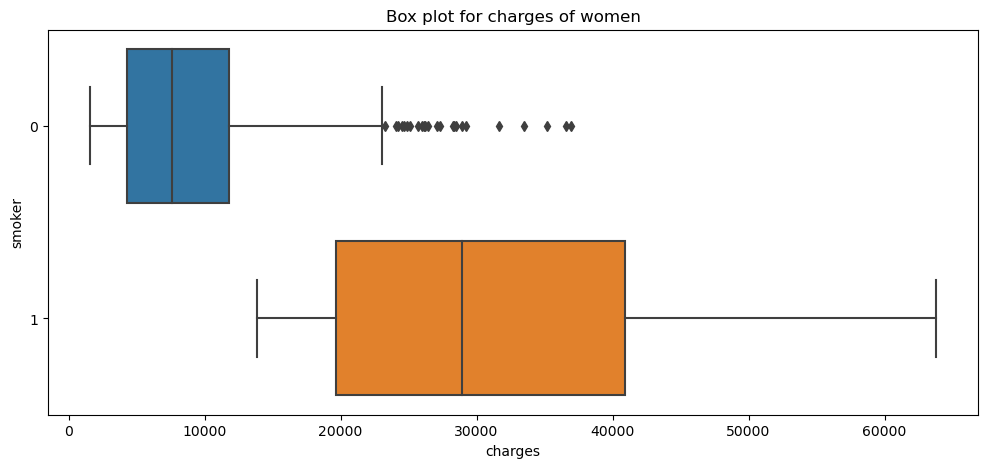

In [49]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 0)] , orient="h")

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

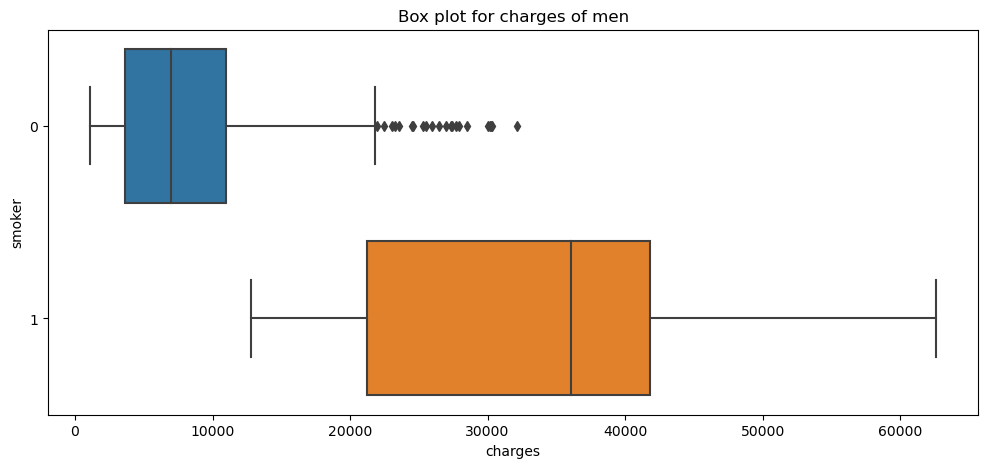

In [50]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 1)] , orient="h")

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


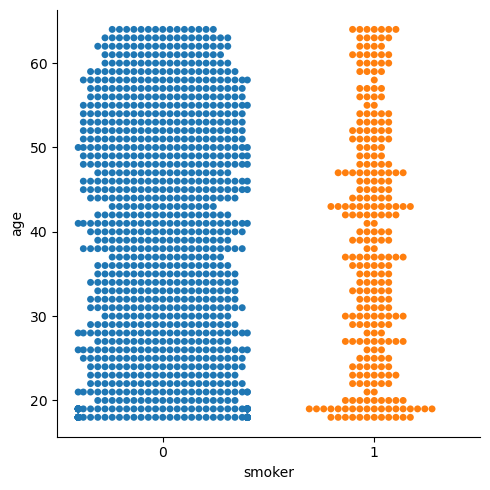

In [52]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df )

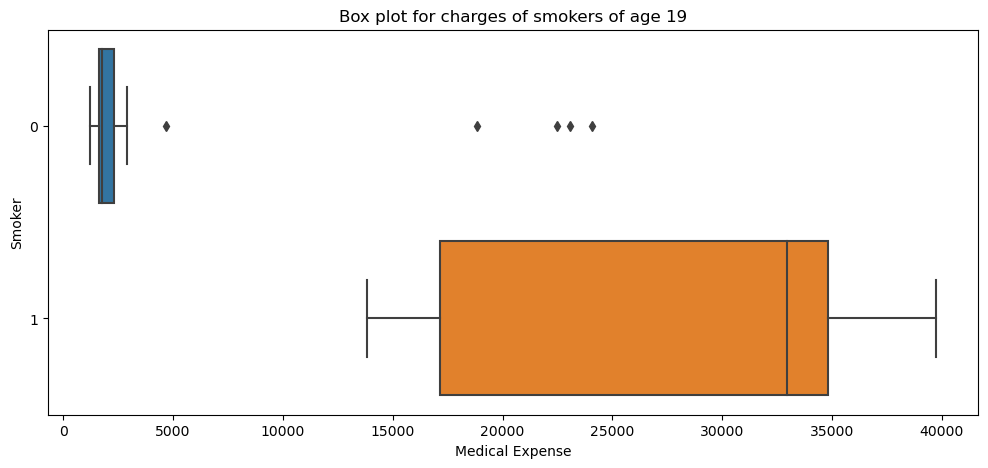

In [53]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

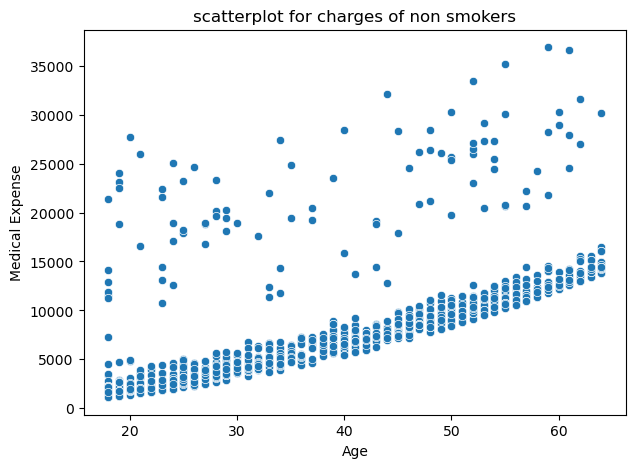

In [54]:
#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

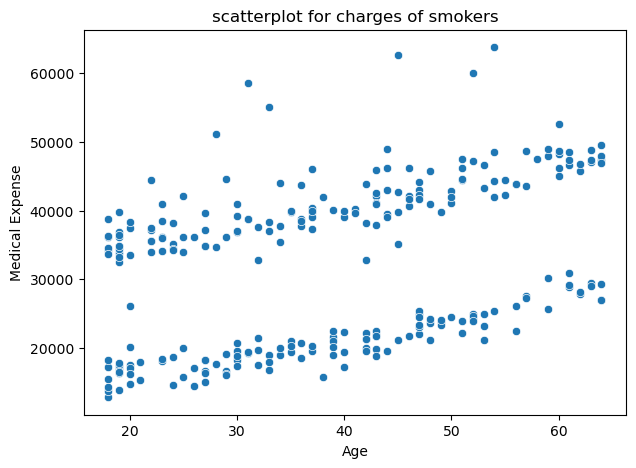

In [55]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

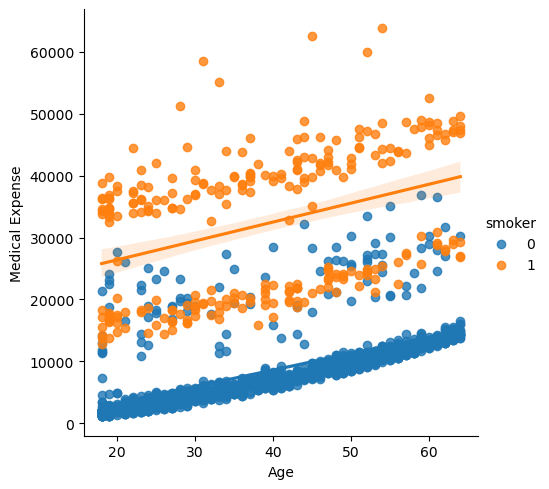

In [56]:
#age charges distribution
sns.lmplot(x="age", y="charges", data = df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


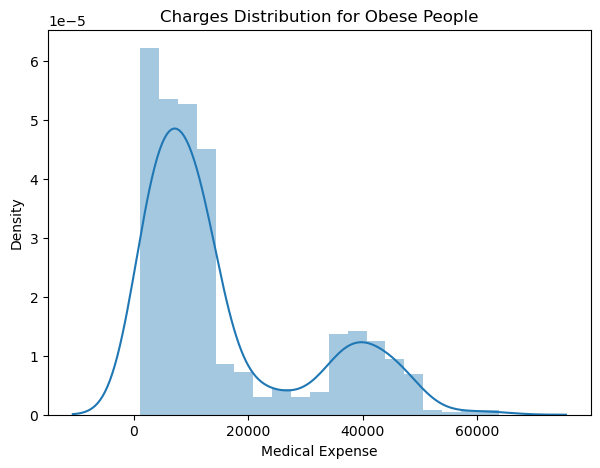

In [57]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


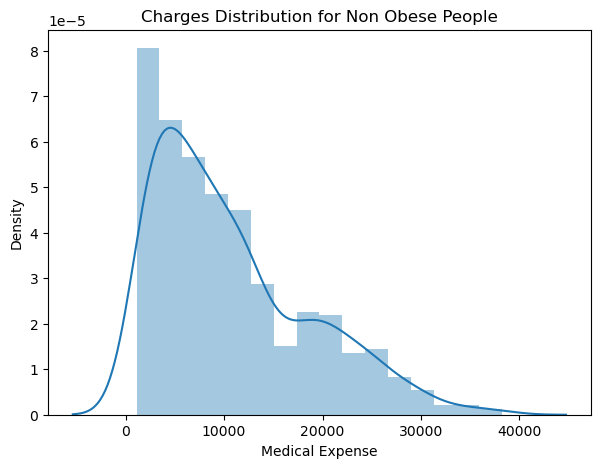

In [58]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

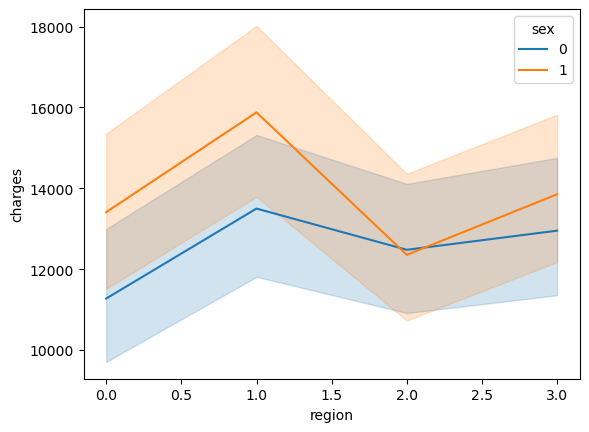

In [62]:
sns.lineplot(x= 'region' , y = 'charges' , data=df , hue= 'sex')
plt.show()

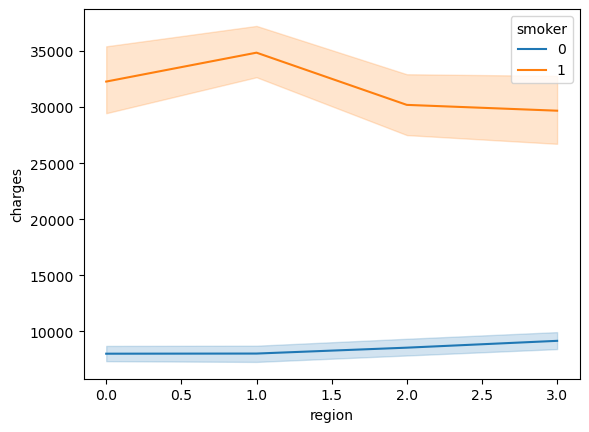

In [63]:
sns.lineplot(x= 'region' , y = 'charges' , data=df , hue= 'smoker')
plt.show()

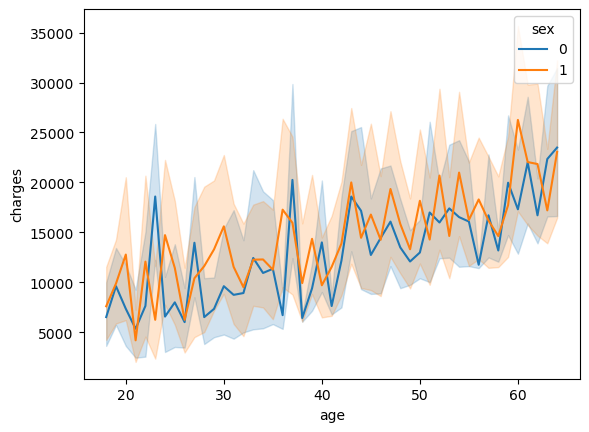

In [64]:
sns.lineplot(x= 'age' , y = 'charges' , data=df , hue= 'sex')
plt.show()

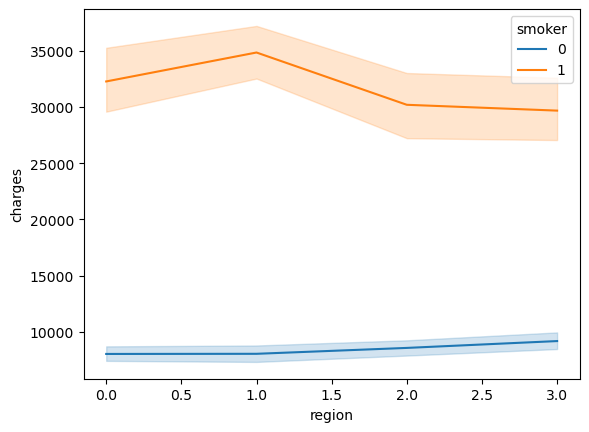

In [65]:
sns.lineplot(x= 'region' , y = 'charges' , data=df , hue= 'smoker')
plt.show()

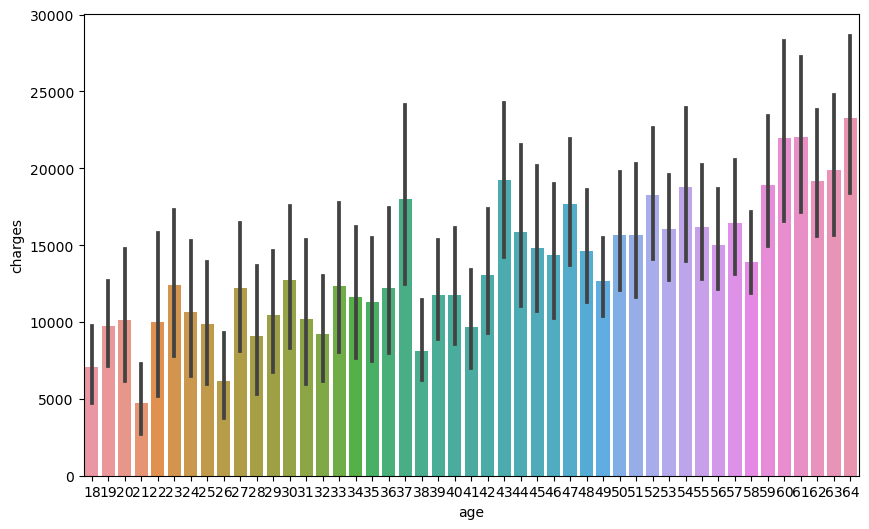

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'age' , y = 'charges' , data=df )
plt.show()

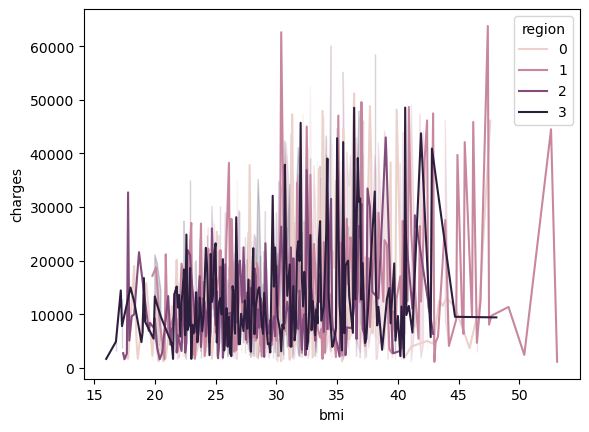

In [68]:
sns.lineplot(x= 'bmi' , y = 'charges' , data=df , hue='region')
plt.show()

In [74]:
numeric_data = df[['age' , 'bmi' , 'children' , 'charges']]

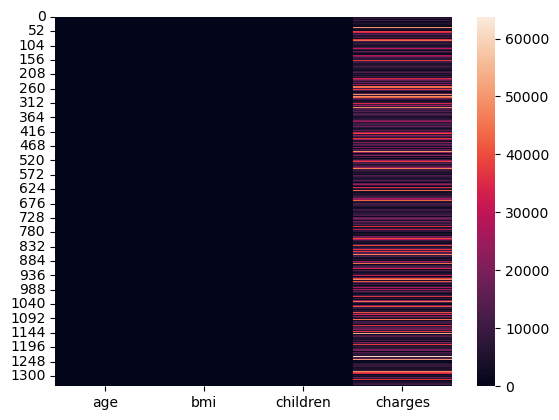

In [75]:
sns.heatmap(numeric_data)
plt.show()

In [76]:
from sklearn import preprocessing

In [77]:
for col in df.select_dtypes(include=['object']).columns:
    label_encider = preprocessing.LabelEncoder()
    lable_encoder.fit(df[col].unique())
    
    df[col] = label_encoder.transform(df[col])

In [78]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


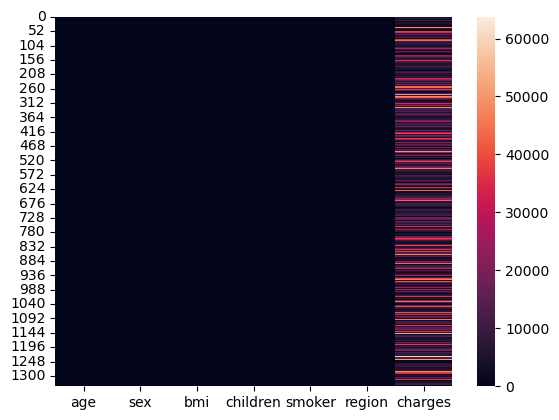

In [80]:
sns.heatmap(df)
plt.show()

In [81]:
X = df.drop('charges' , axis = 1)

In [82]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2
1334,18,0,31.9,0,0,3
1335,18,0,36.9,0,0,1
1336,21,0,25.8,0,0,0


In [83]:
y = df['charges']

In [84]:
y =y/1000

In [85]:
y

0       16.88492
1        1.72555
2        4.44946
3       21.98447
4        3.86686
          ...   
1333    10.60055
1334     2.20598
1335     1.62983
1336     2.00795
1337    29.14136
Name: charges, Length: 1338, dtype: float64

In [86]:
def featurescaling(X):
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    
    return (X-Xmean)/Xstd

In [87]:
X = featurescaling(X)

In [88]:
X.mean(axis=0)

age        -1.810543e-16
sex        -1.075373e-16
bmi        -9.137766e-15
children   -2.540735e-16
smoker     -1.908455e-17
region     -2.398015e-17
dtype: float64

In [89]:
X.std(axis=0)

age         1.0
sex         1.0
bmi         1.0
children    1.0
smoker      1.0
region      1.0
dtype: float64

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
Xtrain , Xtest , Ytrain , ytest , = train_test_split(X , y , test_size=0.3, random_state=101)

In [94]:
model = LinearRegression()

In [96]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [98]:
Y_predict = model.predict(Xtest)

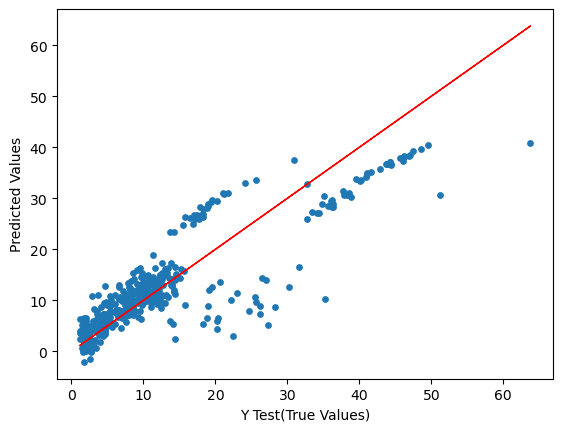

In [100]:
plt.scatter(ytest,Y_predict,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(ytest, ytest, color='red', lw=1)

plt.show()

In [101]:
from sklearn.metrics import r2_score,mean_squared_error

In [102]:
r2 = r2_score(ytest,Y_predict)

In [103]:
r2

0.7613030907611257

In [106]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(ytest,Y_predict))
print('MSE:', metrics.mean_squared_error(ytest,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,Y_predict)))
print('Variance:', metrics.explained_variance_score(ytest,Y_predict))

MAE: 3.9902267376081078
MSE: 33.5314675232898
RMSE: 5.790636193311561
Variance: 0.7616625278335719


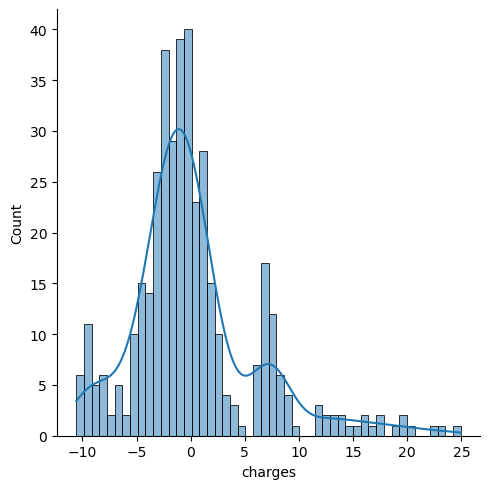

In [107]:
sns.displot((ytest-Y_predict) , kde=True,bins=50)
plt.show()

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
decision_tree = DecisionTreeRegressor()

In [110]:
decision_tree.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [111]:
Y_predict = decision_tree.predict(Xtest)

In [112]:
decision_tree.score(Xtest,ytest)

0.6438555011695584

In [113]:
r2 = r2_score(ytest , Y_predict)

In [114]:
r2

0.6438555011695584

In [115]:
print('MAE:', metrics.mean_absolute_error(ytest,Y_predict))
print('MSE:', metrics.mean_squared_error(ytest,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,Y_predict)))

MAE: 3.491322487562189
MSE: 50.03017313550696
RMSE: 7.073201052953816


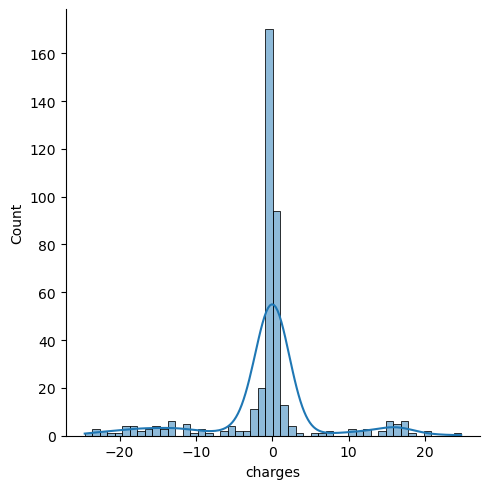

In [116]:
sns.displot((ytest-Y_predict), kde=True,bins=50)
plt.show()